In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [2]:
df=pd.read_excel('iris.xls')

In [3]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [7]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

# Preprocesssing the dataset

### Checking for the null values

In [8]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
df.groupby('Classification').median()

,SL,SW,PL,PW
Classification,,,,
Iris-setosa,5.00,3.4,1.50,0.2
Iris-versicolor,5.85,2.8,4.35,1.3
Iris-virginica,6.50,3.0,5.55,2.0


In [12]:
df2=df.fillna(df.median())

In [13]:
df2.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [14]:
df2.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667
std,0.808567,0.421995,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<AxesSubplot:title={'center':'SL'}>,
        <AxesSubplot:title={'center':'SW'}>],
       [<AxesSubplot:title={'center':'PL'}>,
        <AxesSubplot:title={'center':'PW'}>]], dtype=object)

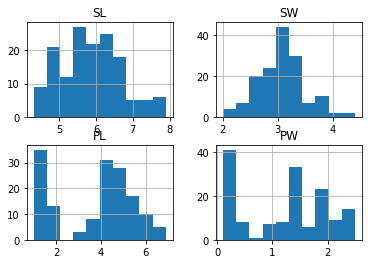

In [15]:
df2.hist()

Iris-setosa             AxesSubplot(0.1,0.559091;0.363636x0.340909)
Iris-versicolor    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
Iris-virginica              AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

<Figure size 1440x1440 with 0 Axes>

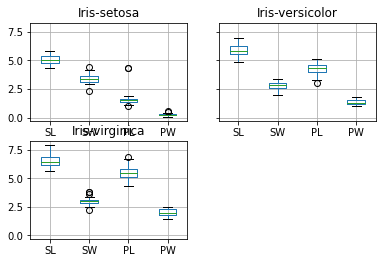

In [16]:
plt.figure(figsize = (20,20))
df2.groupby('Classification').boxplot()

#ScatterPlot

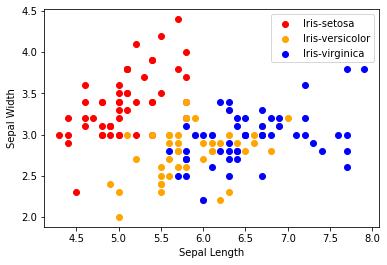

In [17]:
colors=['red','orange','blue']
classification=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
    x=df2[df2['Classification']==classification[i]]
    plt.scatter(x['SL'],x['SW'],c=colors[i],label=classification[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

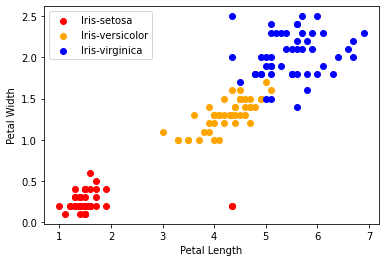

In [18]:
for i in range(3):
    x=df2[df2['Classification']==classification[i]]
    plt.scatter(x['PL'],x['PW'],c=colors[i],label=classification[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

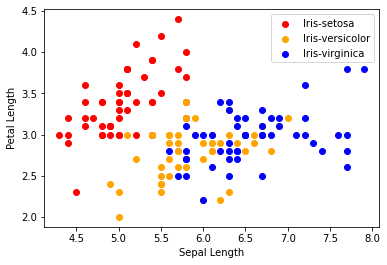

In [19]:
for i in range(3):
    x=df2[df2['Classification']==classification[i]]
    plt.scatter(x['SL'],x['SW'],c=colors[i],label=classification[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

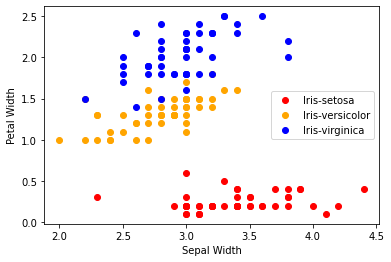

In [20]:
for i in range(3):
    x=df2[df2['Classification']==classification[i]]
    plt.scatter(x['SW'],x['PW'],c=colors[i],label=classification[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

# Coorelation Matrix

In [21]:
df2.corr()

,SL,SW,PL,PW
SL,1.000000,-0.099107,0.830554,0.800939
SW,-0.099107,1.000000,-0.405531,-0.338655
PL,0.830554,-0.405531,1.000000,0.936089
PW,0.800939,-0.338655,0.936089,1.000000


<AxesSubplot:>

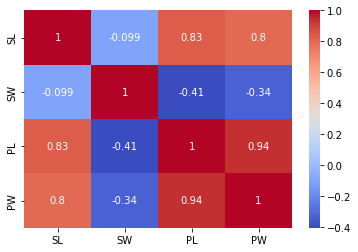

In [22]:
sns.heatmap(df2.corr(),annot=True,cmap='coolwarm')

We can drop the sw.

### Label Encoder

In [23]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
labels=['Classification']

In [24]:
df2['Classification']=label_en.fit_transform(df2['Classification'])

In [25]:
df2

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


# Model Training(Splitting data)

In [26]:
from sklearn.model_selection import train_test_split
x=df2.drop(columns=['Classification','SW'],axis=1)
y=df2['Classification']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1,stratify = y)

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(x_train,y_train)
ypred = lr.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45




# Random Forest

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(x_train,y_train)
ypred = lr.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



# SVM

In [29]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
ypred = svc.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Conclusion

All models are providing the same result.
We can use the simplest model from the above.
That is lo